In [1]:
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import time 
import sys 
sys.path.append('/Users/aleksandra/Desktop/Research/ILC_params/')

from HOD import *
from ilc_params import *

font = {'size'   : 16, 'family':'STIXGeneral'}
plt.rcParams.update({
     "text.usetex": True,
     "font.family": "serif",
     "font.sans-serif": ['Computer Modern']})
plt.rc_context({'axes.autolimit_mode': 'round_numbers'})

# Setup

In [75]:
color = "blue" 

path_plots = "/Users/aleksandra/Desktop/deCIB_plots/"

In [3]:
if color=="blue":
    hod_pdict = blue_hod_pdict
    s = s_blue
if color=="green":
    hod_pdict = green_hod_pdict
    s = s_green
if color=="red":
    hod_pdict = red_hod_pdict  
    s = s_red
    
hod_pdict['galaxy_sample_id']

'blue'

# Dictionaries

In [4]:
# copied from : https://github.com/simonsobs/websky_model/blob/a93bbf758432a936c0ec2b59775683b695d3d191/websky_model/websky.py#L55
websky_Omega_M = 0.31
websky_Omega_B = 0.049
websky_Omega_L = 0.69
websky_h = 0.68
websky_sigma_8 = 0.81
websky_n_s = 0.965

websky_cosmo = {
    'omega_b': websky_Omega_B*websky_h**2.,
    'omega_cdm': (websky_Omega_M-websky_Omega_B)*websky_h**2.,
    'h': websky_h,
    'tau_reio': 0.0543,
    'sigma8': websky_sigma_8,
    'n_s': websky_n_s, 
    'use_websky_m200m_to_m200c_conversion': 1
}

chimin = 50.0
chimax = 8e3
Mmin_websky_msun   = 1.3e12 # approximately websky minimum M200m value
Mmax_websky_msun   = 1e16

z_min_websky = 0.011303262941254161
z_max_websky= 5.145332762080156

websky_common_settings = {
                   'mass function' : 'T08', 
                   #'delta for cib' : '200m',
                   'hm_consistency': 0,
                   'concentration parameter': 'D08',  # Duffy et al 2008 
                    'ell_max': 10000.,
                    'ell_min': 2.,
                    'dlogell': 0.1,
                    'M_min':Mmin_websky_msun*websky_h, # all masses in Msun/h
                   'M_max':Mmax_websky_msun*websky_h,
                   'z_min': z_min_websky,
                   'z_max': z_max_websky,


}

In [5]:
path_ps = "/Users/aleksandra/software/class_sz/sz_auxiliary_files/"

ell_ws, ws_tsz = np.loadtxt(path_ps+"websky_april_8192.txt").T
ell_ws, ws_tsz

(array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 2.4573e+04, 2.4574e+04,
        2.4575e+04]),
 array([0.00000000e+00, 6.93823520e-17, 7.85977404e-17, ...,
        3.66876222e-13, 3.64408590e-13, 3.69778916e-13]))

## Websky with original settings

In [6]:
#websky cosmo
W = Class()
W.set(websky_cosmo)
W.set(websky_tsz_pdict)
W.set(websky_common_settings)

W.set({# class_sz parameters:
        'output':'tSZ_1h,tSZ_2h',
        'class_sz_verbose':0,
        'M_min_tSZ': Mmin_websky_msun*websky_h, #works perfectly
        'M_max_tSZ': Mmax_websky_msun*websky_h,
        })
        
W.compute()



In [7]:
cl_tsz1 = W.cl_sz()
tsz1 = np.asarray(cl_tsz1['1h']) + np.asarray(cl_tsz1['2h'])
ell1 = np.asarray(cl_tsz1['ell'])
tsz1[:30]

array([0.00035721, 0.00041394, 0.00047927, 0.00055424, 0.00064037,
       0.0007399 , 0.00085574, 0.00099083, 0.00114753, 0.0013283 ,
       0.00153748, 0.00178128, 0.00206522, 0.0023946 , 0.00277789,
       0.00322427, 0.00374329, 0.00434742, 0.00505002, 0.00586682,
       0.00681484, 0.00791361, 0.00918251, 0.01064703, 0.01233378,
       0.01427216, 0.01649445, 0.01903597, 0.02193478, 0.02522064])

In [36]:
websky_tsz_pdict

{'pressure profile': 'B12',
 'units for tSZ spectrum': 'dimensionless',
 'n_ell_pressure_profile': 100,
 'n_m_pressure_profile': 100,
 'n_z_pressure_profile': 100,
 'x_outSZ': 4.0,
 'truncate_wrt_rvir': 0,
 'pressure_profile_epsrel': 0.001,
 'pressure_profile_epsabs': 1e-40,
 'M_min_tSZ': 879580000000.0,
 'M_max_tSZ': 6766000000000000.0}

## Websky with our setting

In [32]:
#websky 
N = Class()
N.set(p18_pdict)
N.set(websky_tsz_pdict)
N.set(websky_cib_pdict)
N.set(common_settings)

N.set({# class_sz parameters:
        'output':'tSZ_1h,tSZ_2h',
        'class_sz_verbose':0,
        })
        
N.compute()

In [33]:
cl_tsz = N.cl_sz()
tsz = np.asarray(cl_tsz['1h']) + np.asarray(cl_tsz['2h'])
ell = np.asarray(cl_tsz['ell'])
tsz[:20]

array([0.0006935 , 0.03046077, 0.06596159, 0.10249876, 0.13874968,
       0.17383859, 0.20748115, 0.23971938, 0.26756106, 0.30026221,
       0.32881453, 0.35647946, 0.3832921 , 0.4093017 , 0.43435384,
       0.45880127, 0.48262836, 0.5058432 , 0.52842163, 0.5507702 ])

In [18]:
tsz[:20]

array([0.0006925 , 0.02885972, 0.06202954, 0.09734986, 0.13353646,
       0.16928953, 0.20387398, 0.23713731, 0.27123061, 0.29956569,
       0.32917214, 0.35718105, 0.38446127, 0.41071953, 0.43622047,
       0.46093295, 0.48488676, 0.50819412, 0.53043486, 0.55245764])

# Plot compare

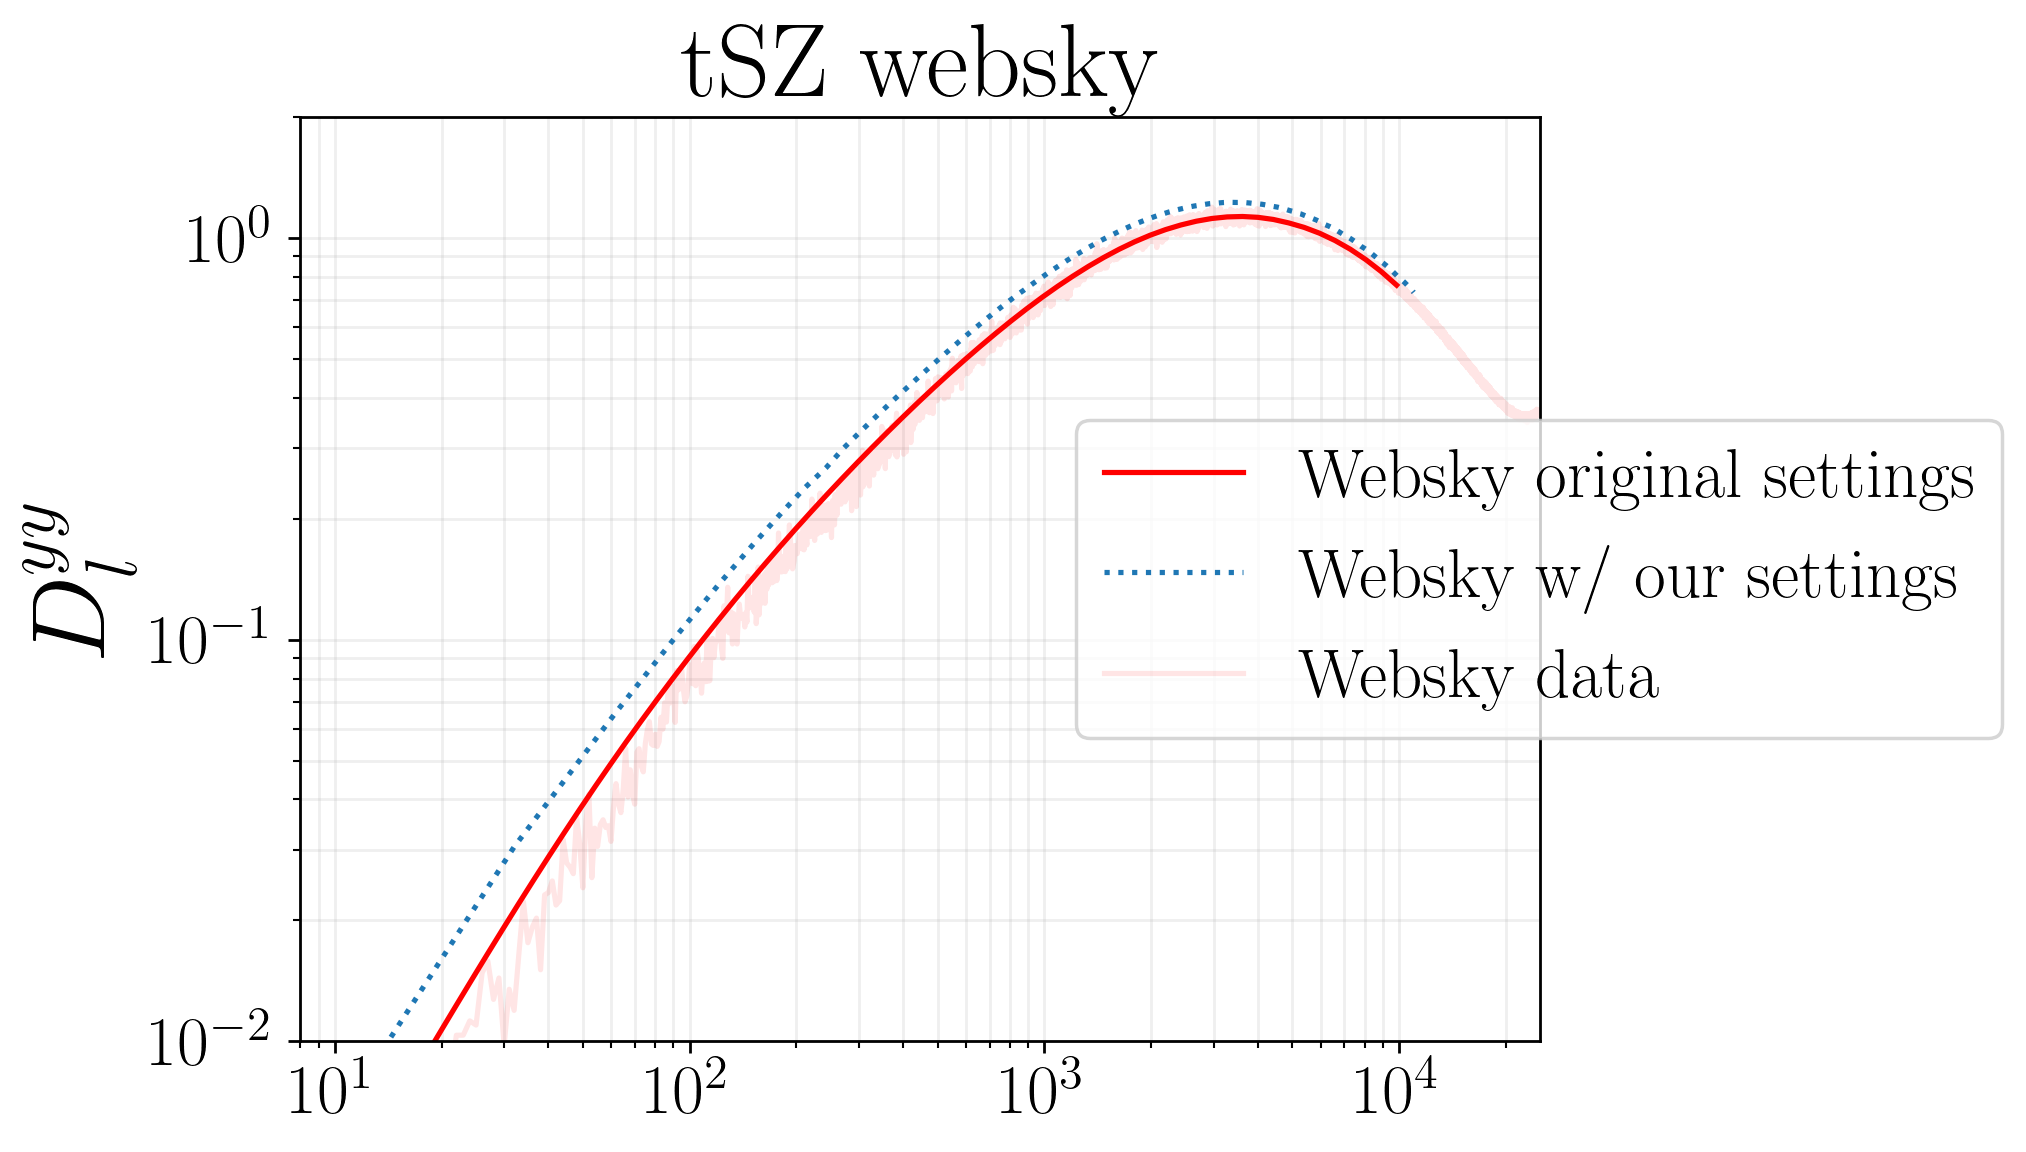

In [34]:
plt.figure( dpi=250)
plt.ylabel(r"$D_l^{yy} \,\,\,$", size=30)
plt.title('tSZ websky ', fontsize=30)


#websky
dl_to_cl1 = ell1*(ell1+1)/2/np.pi
plt.plot(ell1,tsz1,"-", color="red", label=r'Websky original settings')
#websky with websky cosmo
dl_to_cl = ell*(ell+1)/2/np.pi
plt.plot(ell, tsz, ":", label=r'Websky w/ our settings')
#data from Boris
plt.plot(ell_ws, 1e12*ws_tsz, c='r', label = "Websky data", alpha=0.1)

#plt.ylim(7.e0, 5.e5)
plt.xlim(8,2.5e4)
y_min = 1.e-2
y_max = 2
plt.ylim(y_min,y_max)
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(which='both',alpha=0.2)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=20)



In [38]:
# 2015 Planck y-map paper results
# ell bin centers
Planckelleff2015 = [10.0, 13.5, 18.0, 23.5, 30.5, 40, 52.5, 68.5, 89.5, 117, 152.5, 198, 257.5, 335.5, 436.5, 567.5, 738, 959.5, 1247.5]
# D_ell^yy
PlanckDellyy2015 = 1.0e-12*np.array([0.00506, 0.00876, 0.01353, 0.02946, 0.02191, 0.02744, 0.04093, 0.04227, 0.06463, 0.10738, 0.12858, 0.15696, 0.21738, 0.28652, 0.36682, 0.42666, 0.53891, 0.71103, 0.82294])
# statistical error bars
PlanckDellerrstat2015 = 1.0e-12*np.array([0.00629, 0.00615, 0.00579, 0.00805, 0.00522, 0.00464, 0.00468, 0.00429, 0.00454, 0.00562, 0.00594, 0.00611, 0.00687, 0.00824, 0.00958, 0.01242, 0.01645, 0.02402, 0.04172])
# foreground marginalization error bars
PlanckDellerrfore2015 = 1.0e-12*np.array([0.00002, 0.00007, 0.00015, 0.00021, 0.00053, 0.00109, 0.00172, 0.00320, 0.00567, 0.00969, 0.01889, 0.02895, 0.04879, 0.08374, 0.13524, 0.19500, 0.27718, 0.37576, 0.55162])
# total error bars (assumed add in quadrature)
PlanckDellerr2015 = np.sqrt(PlanckDellerrfore2015**2 + PlanckDellerrstat2015**2) 

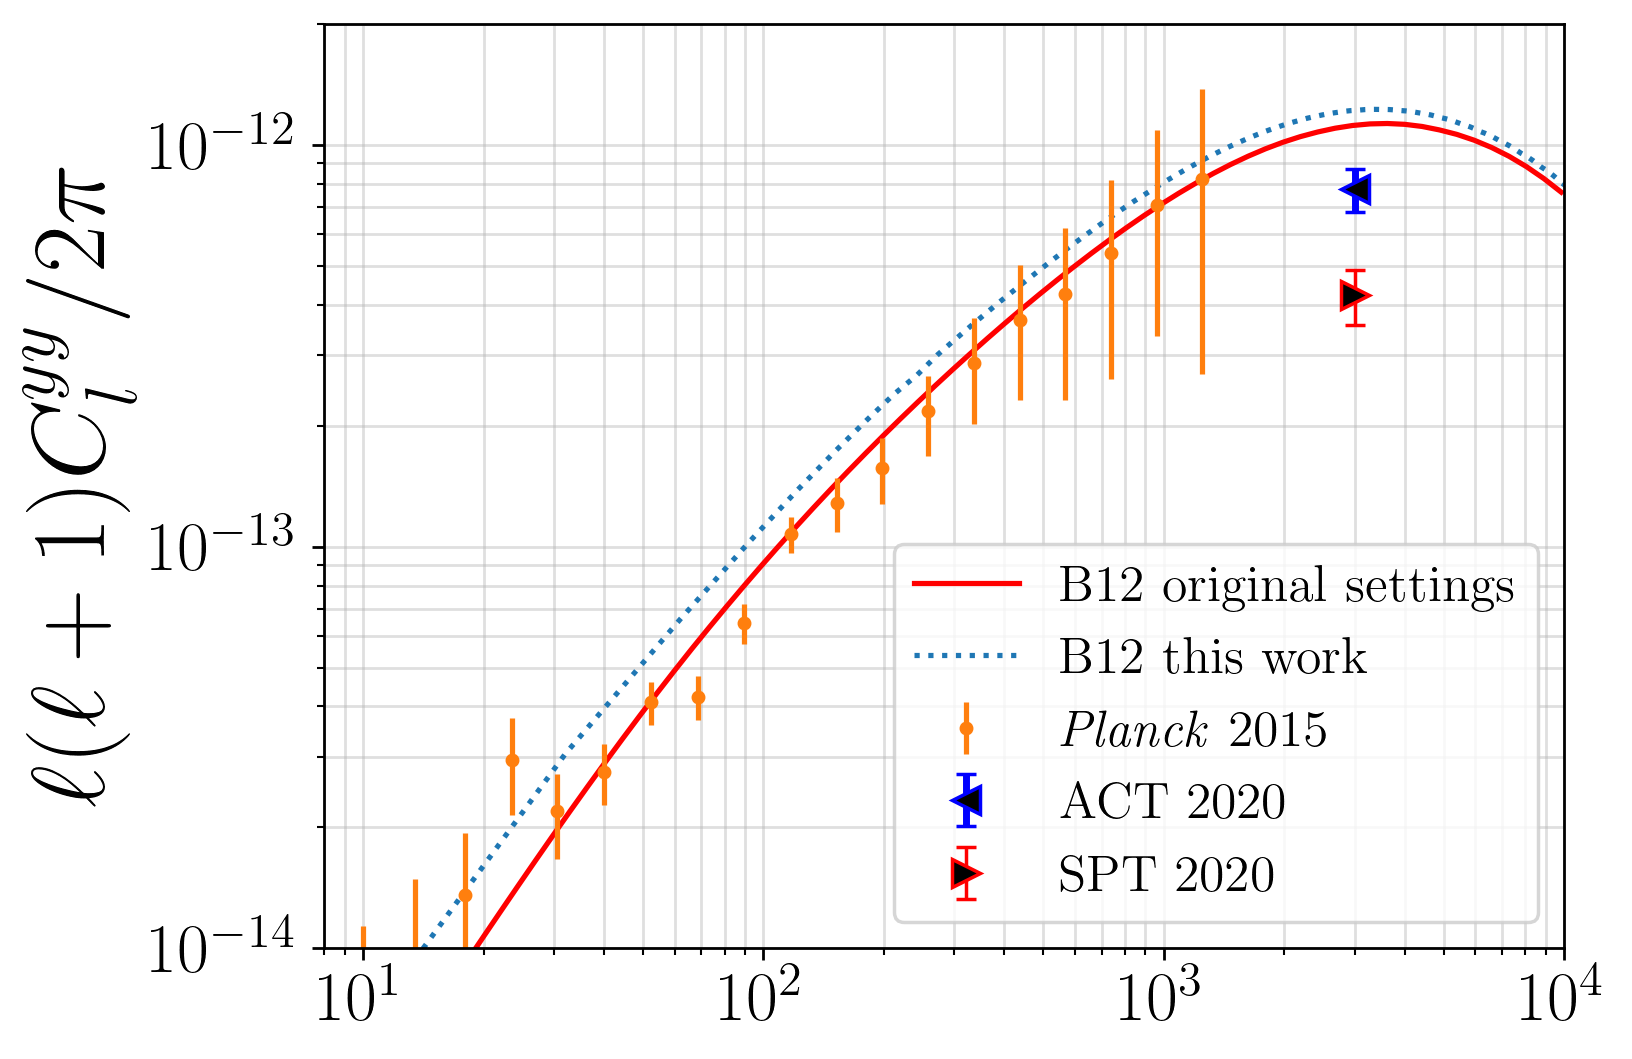

In [77]:
plt.figure( dpi=250)
plt.ylabel(r"$D_l^{yy} \,\,\,$", size=30)
plt.ylabel(r"$\ell (\ell+1) C_l^{yy} / 2 \pi \,\,\,$", fontsize=30)
#plt.title('Compton-$y$', fontsize=30)


#websky
dl_to_cl1 = ell1*(ell1+1)/2/np.pi
plt.plot(ell1,1e-12*tsz1,"-", color="red", label=r'B12 original settings')
#websky with websky cosmo
dl_to_cl = ell*(ell+1)/2/np.pi
plt.plot(ell, 1e-12*tsz, ":", label=r'B12 this work')
#data from Boris
#plt.plot(ell_ws, ws_tsz, c='r', label = "Websky data", alpha=0.1)

#PLANCK 2015
plt.errorbar(Planckelleff2015, PlanckDellyy2015 , yerr = PlanckDellerr2015, fmt=".",  label=r"\emph{Planck} 2015")


ACTDellyy3000 = 5.29/(-0.957)**2./(2.726e6)**2
ACTDellyy3000err = 0.66/(-0.957)**2./(2.726e6)**2

SPTDellyy3000 = 3.42/(-1.044)**2/(2.726e6)**2
SPTDellyy3000err = 0.54/(-1.044)**2/(2.726e6)**2

plt.errorbar([3000],[ACTDellyy3000],
            yerr=[ACTDellyy3000err ],capthick=1,capsize=3,elinewidth=2,\
             fmt='<',mfc='k',markersize=8,color = 'blue',zorder=100, label="ACT 2020")

plt.errorbar([3000],[SPTDellyy3000],
            yerr=[SPTDellyy3000err],capthick=1,capsize=3,elinewidth=1,\
             fmt='>',mfc='k',markersize=8,color = 'r', label = "SPT 2020")


#plt.ylim(7.e0, 5.e5)
plt.xlim(8,1e4)
y_min = 1.e-2
y_max = 2
plt.ylim(1e-12*y_min,1e-12*y_max)
plt.yscale("log")
plt.xscale("log")
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.grid(which='both',alpha=0.4)
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=15)
plt.legend(loc='lower right', fontsize=15)

plt.savefig(path_plots+'yy.pdf', bbox_inches = "tight")
